In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# read the first sheet of the excel file
df = pd.read_excel('../datasets/aku_prin_v2.0.xlsx', sheet_name=0)

In [65]:
active_site = [292, 335, 365, 371, 341]

edges = [369, 371, 335, 341, 365, 423]

# merge the two lists withou duplicates
active_site_edges = list(set(active_site + edges))
active_site_edges

[292, 423, 365, 335, 369, 371, 341]

In [66]:
df.columns

Index(['patient', 'sex', 'birth', 'creatinine_urines mg/dl', 'HGA_u mg/dl',
       'HGA_U mg/24h', 'bqa', 'urate', 'uric_acid_urine', 'tyr_urines',
       'hypoxanthine_urines', 'xanthine_urines', 'Protein change allele 1 ',
       'DNA change allele 1', 'Exon/intron allele 1',
       'Protein change allele 2', 'DNA change allele 2', 'ex/in allele 2',
       'SAA (ug/mL) ', 'chitotriosidase', 'HGA_serum', 'CATD (ng/mL)',
       'IL-6 (pg/mL)', 'IL-1beta (pg/mL)', 'IL-1ra (pg/mL)', 'TNFalfa (pg/mL)',
       'CRP (mg/dL)', 'CRP (æg/mL) ELISA', 'MMP3 (ng/mL)', 'aopp',
       'glucose(mg/dL)', 'creatinine (mg/dL)', 'cholesterol (mg/dL)',
       'triglycerides  (mg/dL)', 'hdl_cholesterol (mg/dL)',
       'ldl_cholesterol (mg/dL)', 'alkaline_phosphatase (UI/L)',
       'cystatin_C (mg/dL)', 'smoker/cigarettes_a_day', 'alcohol_units_weekly',
       'bmi', 'physical_health_score', 'mental_health_score',
       'AKUSSI_jointpain', 'AKUSSI_spinalpain', 'KOOSpain', 'KOOSsymptoms',
       'KOOSdai

In [67]:
#get the 'Protein change allele 1' and 'Protein change allele 2' columns as a list
protein_change_allele1 = df['Protein change allele 1 '].tolist()
protein_change_allele2 = df['Protein change allele 2'].tolist()



In [68]:
protein_change = protein_change_allele1 + protein_change_allele2

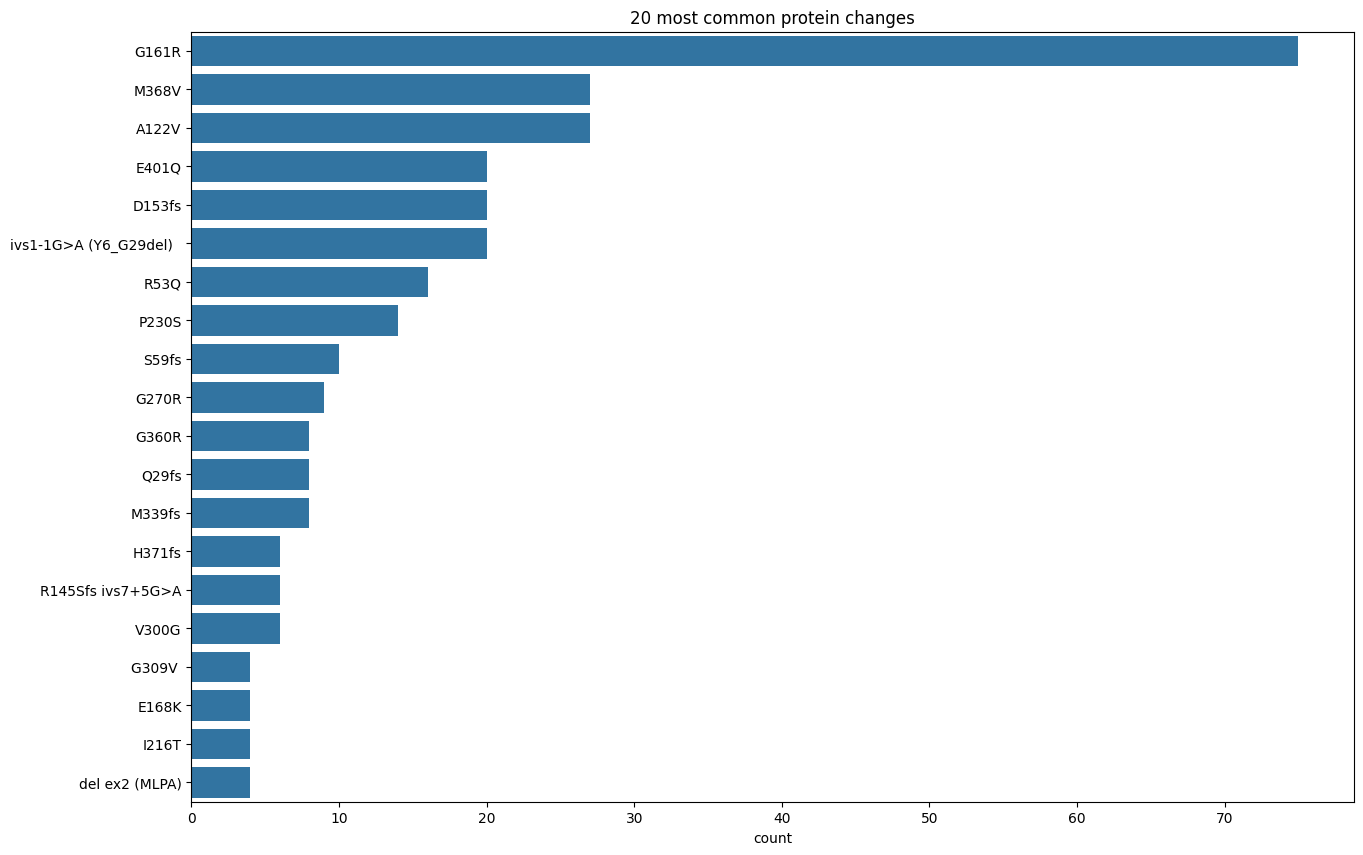

In [69]:
# plot the 20 most common protein changes
plt.figure(figsize=(15, 10))
sns.countplot(y=protein_change, order=pd.Series(protein_change).value_counts().iloc[:20].index)
plt.title('20 most common protein changes')
plt.show()



In [70]:
# remove null values from protein_change 
protein_change = [x for x in protein_change if str(x) != 'nan']

In [71]:
t = []
for i in active_site_edges:
    for j in protein_change:
        if str(i) in str(j):
            t.append(j)

In [72]:
t = list(set(t))
t

['H371fs', 'His371Profs']

In [51]:
# check 'psysical_health_score' and 'mental_health_score' columns for the entry that has the protein change in the set t
df.loc[df['Protein change allele 1 '].isin(t) | df['Protein change allele 2'].isin(t), ['Protein change allele 1 ', 'Protein change allele 2', 'physical_health_score', 'mental_health_score']]


,Protein change allele 1,Protein change allele 2,physical_health_score,mental_health_score
0,G161R,His371Profs,26.0,43.0
23,G161R,H371fs,35.0,50.0
24,ivs1-1G>A (Y6_G29del),H371fs,40.0,46.0
25,G270R,His371Profs,35.0,38.0
26,G161R,H371fs,28.0,39.0
35,G161R,H371fs,57.0,62.0
36,G270R,H371fs,24.0,65.0
37,G161R,H371fs,56.0,61.0


In [ ]:
# check 'psysical_health_score' and 'mental_health_score' columns for the entry that has the protein change in the set t


# mean scores and mean scoresd mutation on active sites

In [52]:
# calculate the mean of 'physical_health_score' and 'mental_health_score' for the entire df ignoring null values
mean_physical_health_score = df['physical_health_score'].mean()
mean_mental_health_score = df['mental_health_score'].mean()

mean_physical_health_score, mean_mental_health_score

(36.78846153846154, 45.916666666666664)

In [53]:
# calculate the mean of 'physical_health_score' and 'mental_health_score' for the entries that have the protein change in the set t
mean_physical_health_score_t = df.loc[df['Protein change allele 1 '].isin(t) | df['Protein change allele 2'].isin(t), 'physical_health_score'].mean()
mean_mental_health_score_t = df.loc[df['Protein change allele 1 '].isin(t) | df['Protein change allele 2'].isin(t), 'mental_health_score'].mean()

mean_physical_health_score_t, mean_mental_health_score_t

(37.625, 50.5)

---

# lets try on the neighbors too

In [54]:
active_set_neighbors = []
for i in active_site_edges:
    active_set_neighbors.append(i - 1)
    active_set_neighbors.append(i)
    active_set_neighbors.append(i + 1)

active_set_neighbors

[291,
 292,
 293,
 422,
 423,
 424,
 364,
 365,
 366,
 334,
 335,
 336,
 368,
 369,
 370,
 370,
 371,
 372,
 340,
 341,
 342]

In [55]:
t = []
for i in active_set_neighbors:
    for j in protein_change:
        if str(i) in str(j):
            t.append(j)

t = list(set(t))

In [56]:
t

['H371fs',
 'R336Sfs5',
 'His371Profs',
 'M368V',
 'R336S fs  ivs12-2A>T',
 'G372_P373delinsA']

In [57]:
df.loc[df['Protein change allele 1 '].isin(t) | df['Protein change allele 2'].isin(t), ['Protein change allele 1 ', 'Protein change allele 2', 'physical_health_score', 'mental_health_score']]


,Protein change allele 1,Protein change allele 2,physical_health_score,mental_health_score
0,G161R,His371Profs,26.0,43.0
2,G161R,M368V,23.0,40.0
14,G161R,G372_P373delinsA,56.0,53.0
21,M368V,M368V,15.0,50.0
23,G161R,H371fs,35.0,50.0
24,ivs1-1G>A (Y6_G29del),H371fs,40.0,46.0
25,G270R,His371Profs,35.0,38.0
26,G161R,H371fs,28.0,39.0
27,G362E,M368V,38.0,28.0
35,G161R,H371fs,57.0,62.0


In [62]:
# calculate the mean of 'physical_health_score' and 'mental_health_score' for the entire df not counting null values
mean_physical_health_score = df['physical_health_score'].mean(skipna=True)
mean_mental_health_score = df['mental_health_score'].mean(skipna=True)

mean_physical_health_score, mean_mental_health_score


(36.78846153846154, 45.916666666666664)

In [59]:
# calculate the mean of 'physical_health_score' and 'mental_health_score' for the entries that have the protein change in the set t
mean_physical_health_score_t = df.loc[df['Protein change allele 1 '].isin(t) | df['Protein change allele 2'].isin(t), 'physical_health_score'].mean()
mean_mental_health_score_t = df.loc[df['Protein change allele 1 '].isin(t) | df['Protein change allele 2'].isin(t), 'mental_health_score'].mean()

mean_physical_health_score_t, mean_mental_health_score_t

(36.88, 45.84)

In [75]:
# order the dataframes by 'physical_health_score' in descending order
df.sort_values('physical_health_score', ascending=False, inplace=True)

# get the top 10 entries with the lowest 'physical_health_score' and show only the 'Protein change allele 1 ', 'Protein change allele 2', 'physical_health_score', 'mental_health_score' columns
df.nsmallest(10, 'physical_health_score')[['Protein change allele 1 ', 'Protein change allele 2', 'physical_health_score', 'mental_health_score']]


,Protein change allele 1,Protein change allele 2,physical_health_score,mental_health_score
104,G161R,G161R,14.0,49.0
21,M368V,M368V,15.0,50.0
107,M339fs,M339fs,15.0,50.0
18,G161R,G161R,16.0,30.0
97,E401Q,E401Q,19.0,53.0
105,C120F,C120F,19.0,61.0
94,G161R,G161R,21.0,36.0
47,S59fs,G205V,21.0,45.0
95,S150L,G161R,22.0,66.0
109,G161R,F227S,22.0,36.0


In [76]:

# order the dataframes by 'mental_health_score' in descending order
df.sort_values('mental_health_score', ascending=False, inplace=True)

# get the top 10 entries with the lowest 'mental_health_score' and show only the 'Protein change allele 1 ', 'Protein change allele 2', 'physical_health_score', 'mental_health_score' columns
df.nsmallest(10, 'mental_health_score')[['Protein change allele 1 ', 'Protein change allele 2', 'physical_health_score', 'mental_health_score']]



,Protein change allele 1,Protein change allele 2,physical_health_score,mental_health_score
17,G161R,G161R,40.0,2.0
13,R225P,I216T,33.0,17.0
113,I216T,G360R,61.0,24.0
154,G361R,P332R,35.0,25.0
40,D153fs,A218fs,28.0,26.0
142,ivs1-1G>A (Y6_G29del),ivs1-1G>A (Y6_G29del),32.0,26.0
179,R53Q,R53Q,27.0,27.0
27,G362E,M368V,38.0,28.0
141,ivs1-1G>A (Y6_G29del),ivs1-1G>A (Y6_G29del),26.0,28.0
39,E401Q,E401Q,44.0,28.0
